#### By Salfatore

In [1]:
import numpy as np
import math as mt
import logging as log

import matplotlib.pyplot as plt
import random as rnd

In [2]:
log.basicConfig (level=log.ERROR)
log.error ('Matrix is singular')

ERROR:root:Matrix is singular


In [3]:
def Tukar (matrix, a, b):
    matrix[[a, b]] = matrix[[b, a]]

#### Least-Square Fit

In [4]:
def GaussPivot (a, b, tol=1.0e-12):

    n = len(b)
  # Set up scale factors
    s = np.zeros(n)

    for i in range(n):
        s[i] = max(np.abs(a[i,:]))

    for k in range(0,n-1):

      # Row interchange, if needed
        p = np.argmax(np.abs(a[k:n,k])/s[k:n]) + k

        if abs(a[p,k]) < tol: 
            log.error('Matrix is singular')
        if p != k:
            Tukar(b,k,p)
            Tukar(s,k,p)
            Tukar(a,k,p)

      # Elimination
        for i in range(k+1,n):
            if a[i,k] != 0.0:
                lam = a[i,k]/a[k,k]
                a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
                b[i] = b[i] - lam*b[k]

    if abs(a[n-1,n-1]) < tol: 
        log.error('Matrix is singular')
                                        
  # Back substitution
    b[n-1] = b[n-1]/a[n-1,n-1]

    for k in range(n-2,-1,-1):
        b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
    return b

In [5]:
def polyFit(xData, yData, m):
    
    a = np.zeros((m+1,m+1))
    b = np.zeros(m+1)
    s = np.zeros(2*m+1)

    for i in range(len(xData)):
        temp = yData[i]
        for j in range(m+1):
            b[j] = b[j] + temp
            temp = temp*xData[i]
        temp = 1.0

        for j in range(2*m+1):
            s[j] = s[j] + temp
            temp = temp*xData[i]

    for i in range(m+1):
        
        for j in range(m+1):
            a[i,j] = s[i+j]
        
    return GaussPivot (a, b)


In [6]:
def stdDev(c,xData,yData):

    def evalPoly(c,x):

        m = len(c) - 1
        p = c[m]
        for j in range(m):
            p = p*x + c[m-j-1]
        return p
    
    n = len(xData) - 1
    m = len(c) - 1
    sigma = 0.0
    
    for i in range(n+1):
        p = evalPoly(c,xData[i])
        sigma = sigma + (yData[i] - p)**2
        
    sigma = mt.sqrt(sigma/(n - m))

    return sigma

In [7]:
def plotPoly (xData,yData,coeff,xlab='x',ylab='y'):
             
    m = len(coeff)
    x1 = min(xData)
    x2 = max(xData)
    dx = (x2 - x1)/20.0
    x = np.arange(x1,x2 + dx/10.0,dx)
    y = np.zeros((len(x)))*1.0

    for i in range(m):
        y = y + coeff[i]*x**i
        
    plt.scatter (xData, yData, color="red", label="data")
    plt.plot (x, y, color="green", label="fitting")

    plt.xlabel (xlab)
    plt.ylabel (ylab)
    plt.grid (True)

    plt.legend (loc="best")
    plt.show()

##### Contoh Soal

In [8]:
x_data = np.array([-0.04,0.93,1.95,2.90,3.83,5.0,      \
                   5.98,7.05,8.21,9.08,10.09])
y_data = np.array([-8.66,-6.44,-4.36,-3.27,-0.88,0.87, \
                   3.31,4.63,6.19,7.4,8.85])

print (f"x = {x_data} \n y = {y_data}")

x = [-0.04  0.93  1.95  2.9   3.83  5.    5.98  7.05  8.21  9.08 10.09] 
 y = [-8.66 -6.44 -4.36 -3.27 -0.88  0.87  3.31  4.63  6.19  7.4   8.85]


In [9]:
while True:

    try:

        m = eval(input("\nDegree of polynomial ==> "))
        coeff = polyFit (x_data, y_data, m)
        print("Coefficients are:\n",coeff)
        print("Std. deviation =", stdDev (coeff,x_data, y_data) )
    
    except SyntaxError: break

input("Finished. Press return to exit")

Coefficients are:
 [-8.46603423e+00  1.98104441e+00  2.88447008e-03 -2.98524686e-03]
Std. deviation = 0.31948179156753187
Coefficients are:
 [-8.46603423e+00  1.98104441e+00  2.88447008e-03 -2.98524686e-03]
Std. deviation = 0.31948179156753187
Coefficients are:
 [-8.57005662  2.15121691 -0.04197119]
Std. deviation = 0.3109920728551074


''

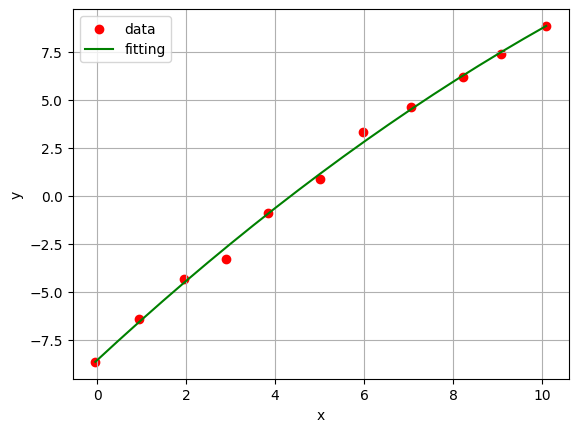

In [10]:
plotPoly (x_data, y_data, coeff)